# Classification Algorithms \#2

yang sudah dibahas:
- Logistic Regression
- KNN, K Nearest Neighbor

yang akan dibahas
- Naive Bayes
- Decision Tree
- Random Forest
- SVM, Support Vector Machine


## recap
Logistic Regression menggunakan teknik matematika untuk plotting sebuah formula (yang basis nya sigmoid) diantara para titik data. setelah dapat formula nya, kita dapat Model machine learning nya. sudah mendapatkan relasi antara fitur2 dan target. target awalnya berbentuk angka antara 0-1 untuk setiap kategori, dan yang angka nya paling tinggi menjadi pilihan kategori klasifikasinya.

KNN, K Nearest Neighbor. menggunakan teknik graph, semua titik di plot, lalu setiap titik baru yang ada, akan dicari tetangga terdekatnya masuk kategori apa, lalu dia ikut2an. jumlah tetangga terdekat ini kita atur sendiri dengan angka K, bisa 1,2,3,... untuk mencari jumlah K yang optimal kita plotting akurasi/error rate dengan jumlah k ke data kita, untuk tes prediksi, dan menggunakan elbow method.

## teknik baru
Naive Bayes:
1. membuat asumsi kalausetiap fitur itu independent. misalkan kita mau tebak seseorang sakit diabetes/tidak menggunakan fitur gula darah, umur, gender orang tersebut. Naive Bayes berasumsi kalau umur seseorang tidak mempengaruhi gender maupun gula darahnya. sebaliknya juga, gender tidak mempengaruhi umur atau gula darah. gula darah tidak mempengaruhi umur atau gender. setiap fitur berdisi sendiri sendiri.
2. menghitung kemungkinan setiap fitur terjadi
3. buatlah sebuah model. model menghitung probabilitas berdasarkan kemungkinan2 tadi.

Decision Tree:


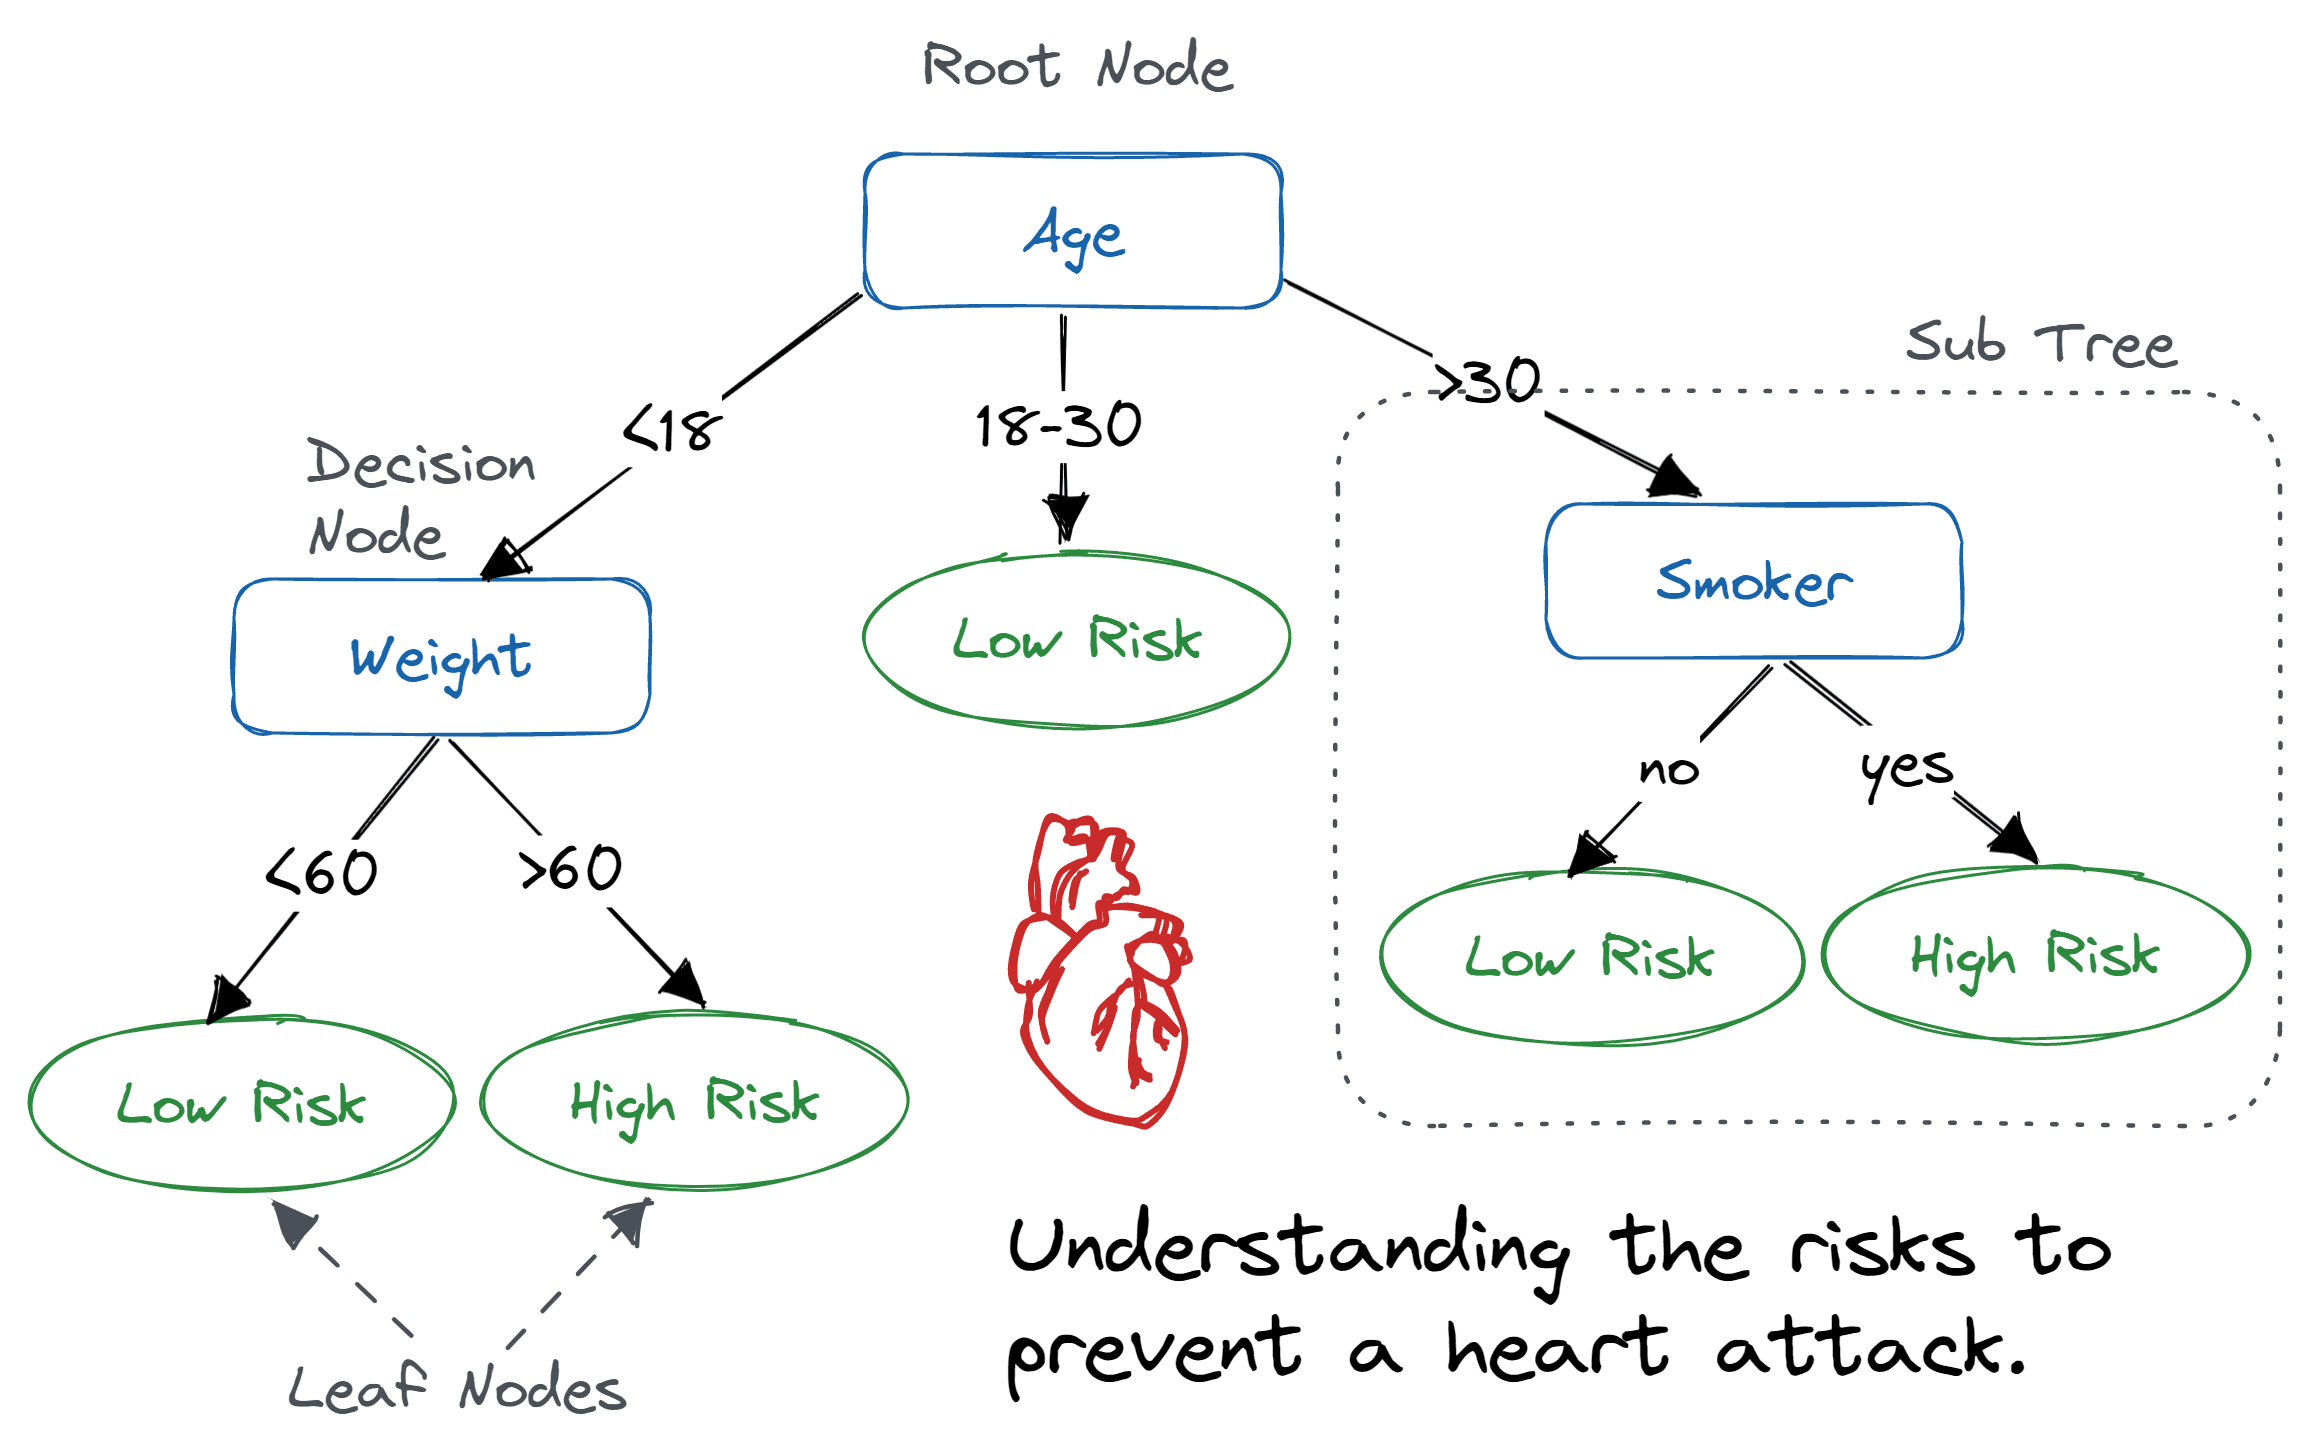

perhatikan gambar diatas. ada root node - akar pohon, awal mula sebuah decision tree.

dari root node tersebut, ada 1 pertanyaan - umurnya berapa? lalu dia bercabang 3 masuk ke decision node, leaf, dan decision node. akar berikut, daun, dan akar berikut. di MACHINE LEARNING yang kita pelajari, hanya ada DUA cabang. selalu hanya ada dua cabang.

leaf node memasukkan data kita ke satu kategori. di contoh diatas ada 2 kategori: low risk dan high risk.

decision tree yang kita buat untuk Machine Learning akan mencoba sebisa mungkin memisahkan data2 yang diberikan ke model tersebut untuk sebersih mungkin, baru sampai jadi daun. kalau bisa 100 data masuk, di ujung daun low risk benar2 100% orang low risk semua. umunya, datanya complex, sehingga ujung daunnya tidak 100% bersih, mungkin isinya 10 low risk, 7 high risk, jadilah daun low risk.

Random Forest:
random forest adalah algoritma ML dimana dia membuat banyak decision tree, ratusan decision tree yang root node nya beda-beda dibuat, dan jadilah sebuah hutan (forest). decision forest menggunakan sistem voting untuk menentukan kategori sebuah data yang sedang di prediksi. misalkan random forest nya punya 100 decision tree, dan data kita orang ini, di voting, 71-29 punya/tidak punya diabetes, maka random forest menentukan orang ini punya diabetes.

Support Vector Machine:
- memisahkan data kategorikal menggunakan garis/kertas/... (optimal hyperplane)
- menggunakan teknik regression untuk garis, teknik lainnya untuk pemisah dimensi 2+, namanya *kernel*
- mencari *support vector* atau titik data yang terdekat ke pemisah dari setiap kategori
- mencari pemisah yang membuat margin antara support vector paling besar

Berikutnya kita akan coba implementasi setiap jenis algoritma ke sebuah dataset.

untuk contoh kali ini kita gunakan dataset properti di Malaysia https://raw.githubusercontent.com/stefkwan-h8/dataset/main/my_kl_property.csv

In [ ]:
# pandas numpy matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# preprocess data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# membuat model machine learning
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# evaluasi model machine learning
from sklearn.metrics import classification_report, confusion_matrix

# optional, untuk visualisasi decision tree
import sklearn.tree as tree
import pydotplus
from six import StringIO
from IPython.display import Image

In [ ]:
df_prop = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/my_kl_property.csv")
df_prop.head()

Location         Price Rooms  Bathrooms  Car Parks  \
0               KLCC, Kuala Lumpur  RM 1,250,000   2+1        3.0        2.0   
1  Damansara Heights, Kuala Lumpur  RM 6,800,000     6        7.0        NaN   
2            Dutamas, Kuala Lumpur  RM 1,030,000     3        4.0        2.0   
3             Cheras, Kuala Lumpur           NaN   NaN        NaN        NaN   
4        Bukit Jalil, Kuala Lumpur    RM 900,000   4+1        3.0        2.0   

          Property Type                      Size        Furnishing  
0    Serviced Residence  Built-up : 1,335 sq. ft.   Fully Furnished  
1              Bungalow  Land area : 6900 sq. ft.  Partly Furnished  
2  Condominium (Corner)  Built-up : 1,875 sq. ft.  Partly Furnished  
3                   NaN                       NaN               NaN  
4  Condominium (Corner)  Built-up : 1,513 sq. ft.  Partly Furnished

In [ ]:
df_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53883 entries, 0 to 53882
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       53883 non-null  object 
 1   Price          53635 non-null  object 
 2   Rooms          52177 non-null  object 
 3   Bathrooms      51870 non-null  float64
 4   Car Parks      36316 non-null  float64
 5   Property Type  53858 non-null  object 
 6   Size           52820 non-null  object 
 7   Furnishing     46953 non-null  object 
dtypes: float64(2), object(6)
memory usage: 3.3+ MB


In [ ]:
df_prop['Location'].nunique()

112

In [ ]:
df_prop['Furnishing'].unique()

array(['Fully Furnished', 'Partly Furnished', nan, 'Unfurnished',
       'Unknown'], dtype=object)

In [ ]:
# agar data yang diimport tidak terhapus, buat backup dulu
df_prop_backup = df_prop.copy()

In [ ]:
# sebelum kita lanjut encoding, aku mau hapus dulu data yang missing
df_prop.dropna(subset=['Location', 'Price', 'Furnishing'], inplace=True)

In [ ]:
# encoding location dan furnishing, untuk kita gunakan sebagai fitur (location) dan target (furnishing)
# kita mau buat model yang memprediksi rumah tersebut ['Fully Furnished', 'Partly Furnished', 'Unfurnished', 'Unknown']
# dari fitur: location dan price

# 1. hapus dulu "RM " dan "," dari kolom Price
df_prop['Price'] = df_prop['Price'].str.replace('R','')
df_prop['Price'] = df_prop['Price'].str.replace('M','')
df_prop['Price'] = df_prop['Price'].str.replace(' ','')
df_prop['Price'] = df_prop['Price'].str.replace(',','')
df_prop['Price'].head()

0    1250000
1    6800000
2    1030000
4     900000
5    5350000
Name: Price, dtype: object

In [ ]:
# ubah tipe data object jadi numerik
df_prop['Price'] = pd.to_numeric(df_prop['Price'])
df_prop['Price'].head()

0    1250000
1    6800000
2    1030000
4     900000
5    5350000
Name: Price, dtype: int64

In [ ]:
# 2. encoding kolom Location dan Furnishing
le = LabelEncoder()
df_prop['Location'] = le.fit_transform(df_prop['Location'])

key_location = le.classes_
print("Location", le.classes_)

Location ['ADIVA Desa ParkCity, Kuala Lumpur' 'Alam Damai, Kuala Lumpur'
 'Ampang Hilir, Kuala Lumpur' 'Ampang, Kuala Lumpur'
 'Bandar Damai Perdana, Kuala Lumpur' 'Bandar Menjalara, Kuala Lumpur'
 'Bandar Sri Damansara, Kuala Lumpur' 'Bandar Tasik Selatan, Kuala Lumpur'
 'Bangsar South, Kuala Lumpur' 'Bangsar, Kuala Lumpur'
 'Batu Caves, Kuala Lumpur' 'Brickfields, Kuala Lumpur'
 'Bukit  Persekutuan, Kuala Lumpur' 'Bukit Bintang, Kuala Lumpur'
 'Bukit Damansara, Kuala Lumpur' 'Bukit Jalil, Kuala Lumpur'
 'Bukit Kiara, Kuala Lumpur' 'Bukit Ledang, Kuala Lumpur'
 'Bukit Tunku (Kenny Hills), Kuala Lumpur'
 'Canary Residence, Kuala Lumpur' 'Casa Rimba, Kuala Lumpur'
 'Chan Sow Lin, Kuala Lumpur' 'Cheras, Kuala Lumpur'
 'City Centre, Kuala Lumpur' 'Country Heights Damansara, Kuala Lumpur'
 'Damansara Heights, Kuala Lumpur' 'Damansara, Kuala Lumpur'
 'Desa Pandan, Kuala Lumpur' 'Desa ParkCity, Kuala Lumpur'
 'Desa Petaling, Kuala Lumpur' 'Dutamas, Kuala Lumpur'
 'Federal Hill, Kuala Lumpur'

In [ ]:
df_prop['Location'].head()

0    44
1    25
2    30
4    15
5    87
Name: Location, dtype: int64

In [ ]:
key_location[45]

'Kemensah, Kuala Lumpur'

encoding mengubah data tipe text kita menjadi numerik.

untuk teknik Label Encoding, setiap text yang unik akan di assign ke satu angka. angkanya urut dari 0.

In [ ]:
# jangan lupa kolom Furnishing juga perlu di encoding
le = LabelEncoder()
df_prop['Furnishing'] = le.fit_transform(df_prop['Furnishing'])

key_furnishing = le.classes_
print("Furnishing", le.classes_)

Furnishing ['Fully Furnished' 'Partly Furnished' 'Unfurnished' 'Unknown']


In [ ]:
df_prop['Furnishing'].head()

0    0
1    1
2    1
4    1
5    1
Name: Furnishing, dtype: int64

In [ ]:
# cek data yang missing
df_prop.isnull().sum()

Location             0
Price                0
Rooms              609
Bathrooms          768
Car Parks        14024
Property Type        0
Size               735
Furnishing           0
dtype: int64

In [ ]:
# data yang kita mau pakai adalah 2 fitur: Price dan Location
# lalu target: Furnishing

X = df_prop[["Location", "Price"]]
Y = df_prop['Furnishing']

X.head()

Location    Price
0        44  1250000
1        25  6800000
2        30  1030000
4        15   900000
5        87  5350000

In [ ]:
print(Y[:5])

0    0
1    1
2    1
4    1
5    1
Name: Furnishing, dtype: int64


# Naive Bayes

In [ ]:
# selesai data cleaning dan encoding, latih model
model_prop_NB = GaussianNB()
model_prop_NB.fit(X, Y)

GaussianNB()

untuk evaluasi model akurat/ tidak umumnya kita gunakan 2 set data, dari data awal kita kita split bagi dua, jadi training dan testing data

evaluasi pakai testing data, data yang belum pernah dilihat oleh modelnya

pas trianing pakai training data

In [ ]:
# bisa ada step tambahan split train dan test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=8)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(37423, 2) (9356, 2) (37423,) (9356,)


In [ ]:
X_train.head()

Location    Price
51763        87   850000
6643         65   670000
1226         44  2700000
1296         28  2800000
41000        44  1250000

In [ ]:
model_prop_NB = GaussianNB()
model_prop_NB.fit(X_train, Y_train)

GaussianNB()

In [ ]:
# sekarang kita bisa evaluasi model pakai data test
# classification report dan confusion matrix
hasil_pred_test = model_prop_NB.predict(X_test)

print(classification_report(Y_test, hasil_pred_test))

              precision    recall  f1-score   support

           0       0.22      0.02      0.04      2766
           1       0.57      0.96      0.71      5339
           2       0.00      0.00      0.00      1148
           3       0.50      0.01      0.02       103

    accuracy                           0.56      9356
   macro avg       0.32      0.25      0.19      9356
weighted avg       0.39      0.56      0.42      9356



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
key_furnishing

array(['Fully Furnished', 'Partly Furnished', 'Unfurnished', 'Unknown'],
      dtype=object)

In [ ]:
confusion_matrix(Y_test, hasil_pred_test)

array([[  65, 2701,    0,    0],
       [ 202, 5137,    0,    0],
       [  22, 1125,    0,    1],
       [   6,   96,    0,    1]])

In [ ]:
def BuatConfusionMatrix(target_asli, hasil_prediksi, jumlah_kategori=2, judul_grafik="", label=False):
  if (label == False): label = range(jumlah_kategori)
  cm = confusion_matrix(target_asli, hasil_prediksi)

  fig, ax = plt.subplots(figsize=(jumlah_kategori+1, jumlah_kategori+1))
  ax.imshow(cm)
  ax.grid(False)
  ax.xaxis.set(ticks=range(jumlah_kategori), ticklabels=label)
  ax.yaxis.set(ticks=range(jumlah_kategori), ticklabels=label)
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Actual")
  ax.set_ylim(jumlah_kategori-0.5, -0.5)
  for i in range(jumlah_kategori):
      for j in range(jumlah_kategori):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

  plt.title(judul_grafik)
  plt.show()

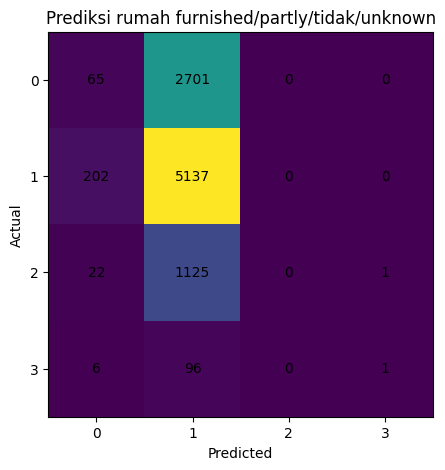

In [ ]:
BuatConfusionMatrix(Y_test, hasil_pred_test, 4, "Prediksi rumah furnished/partly/tidak/unknown")

model ini condong memprediksi semua rumah masuk kategori furnished 1 (partly furnished)

# Decision Tree

In [ ]:
model_prop_DT = DecisionTreeClassifier()
model_prop_DT.fit(X_train, Y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.55      0.56      0.56      2766
           1       0.67      0.75      0.71      5339
           2       0.37      0.16      0.22      1148
           3       0.27      0.15      0.19       103

    accuracy                           0.62      9356
   macro avg       0.47      0.40      0.42      9356
weighted avg       0.59      0.62      0.60      9356



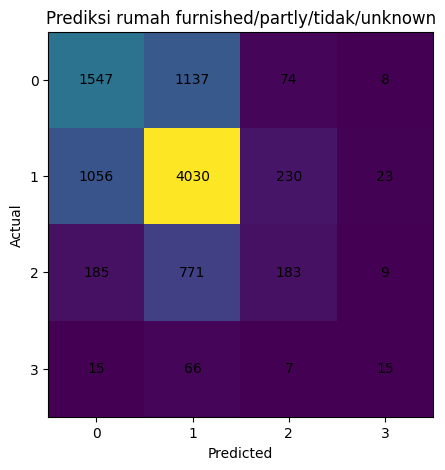

In [ ]:
# evaluasi model
hasil_pred_test = model_prop_DT.predict(X_test)

print(classification_report(Y_test, hasil_pred_test))

BuatConfusionMatrix(Y_test, hasil_pred_test, 4, "Prediksi rumah furnished/partly/tidak/unknown")

In [ ]:
key_furnishing

array(['Fully Furnished', 'Partly Furnished', 'Unfurnished', 'Unknown'],
      dtype=object)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0577744 to fit



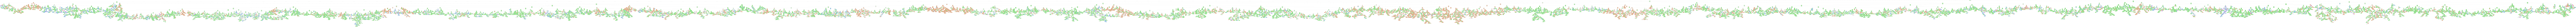

In [ ]:
# optional - visualisasi decision tree

dot_data = StringIO()
tree.export_graphviz(model_prop_DT,
                     out_file=dot_data,
                     class_names=key_furnishing,
                     feature_names=['Location', 'Price'],
                     filled=True,
                     rounded=True,
                     special_characters=True
                     )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

sepertinya decision tree yang dibuat sangat dalam sehingga pembuatan graph sangat lama

In [ ]:
# kita bisa coba buat model decision tree yang lebih akurat, tidak overfit, dengan membuatnya lebih pendek
model_prop_DT2 = DecisionTreeClassifier(max_depth=5)
model_prop_DT2.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.55      0.30      0.39      2766
           1       0.61      0.89      0.72      5339
           2       0.33      0.01      0.01      1148
           3       0.00      0.00      0.00       103

    accuracy                           0.60      9356
   macro avg       0.37      0.30      0.28      9356
weighted avg       0.55      0.60      0.53      9356



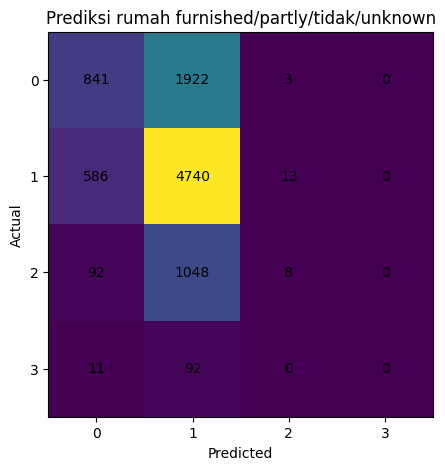

In [ ]:
# evaluasi model
hasil_pred_test = model_prop_DT2.predict(X_test)

print(classification_report(Y_test, hasil_pred_test))

BuatConfusionMatrix(Y_test, hasil_pred_test, 4, "Prediksi rumah furnished/partly/tidak/unknown")

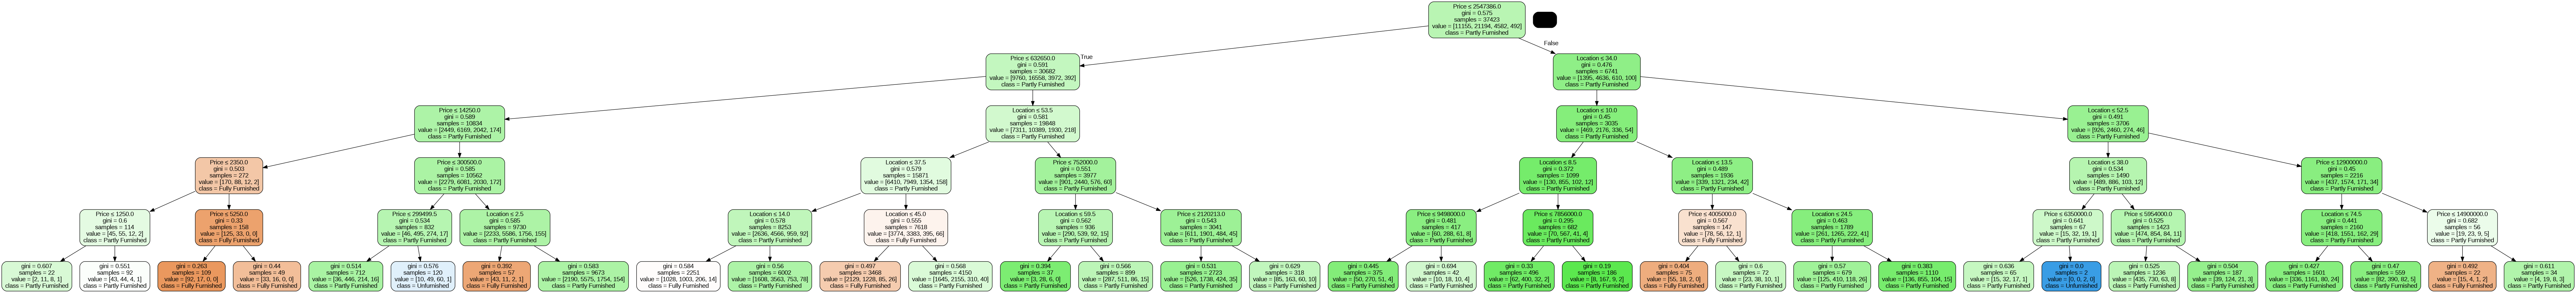

In [ ]:
# optional - visualisasi decision tree

dot_data = StringIO()
tree.export_graphviz(model_prop_DT2,
                     out_file=dot_data,
                     class_names=key_furnishing,
                     feature_names=['Location', 'Price'],
                     filled=True,
                     rounded=True,
                     special_characters=True
                     )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Random Forest
membuat banyak decision tree sekaligus

perk: feature_importances atribut model random forest yang sudah jadi, bisa memberitahu kita, fitur2 mana yang paling berpengaruh ke target

              precision    recall  f1-score   support

           0       0.58      0.52      0.55      2766
           1       0.67      0.78      0.72      5339
           2       0.36      0.19      0.25      1148
           3       0.28      0.17      0.21       103

    accuracy                           0.62      9356
   macro avg       0.47      0.41      0.43      9356
weighted avg       0.60      0.62      0.60      9356



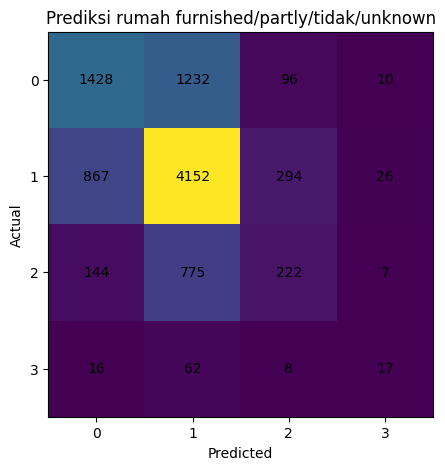

In [ ]:
# latih model
model_prop_RF = RandomForestClassifier(n_estimators=100)
model_prop_RF.fit(X_train, Y_train)

# evaluasi model
hasil_pred_test = model_prop_RF.predict(X_test)

print(classification_report(Y_test, hasil_pred_test))

BuatConfusionMatrix(Y_test, hasil_pred_test, 4, "Prediksi rumah furnished/partly/tidak/unknown")

## Feature Importances

In [ ]:
model_prop_RF.feature_importances_

array([0.2883701, 0.7116299])

In [ ]:
feature_cols = list(X.columns)
print(feature_cols)

['Location', 'Price']


In [ ]:
df_fi = pd.DataFrame(model_prop_RF.feature_importances_, index=feature_cols, columns=['Importances'])
df_fi

Importances
Location      0.28837
Price         0.71163

menurut model Random Forest Classifier kita, yang menentukan sebuah unit rumah furnishing nya tipe apa, adalah 71% Price dan 29% Location

# Support Vector Machine

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2766
           1       0.57      1.00      0.73      5339
           2       0.33      0.00      0.00      1148
           3       0.00      0.00      0.00       103

    accuracy                           0.57      9356
   macro avg       0.23      0.25      0.18      9356
weighted avg       0.37      0.57      0.41      9356



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


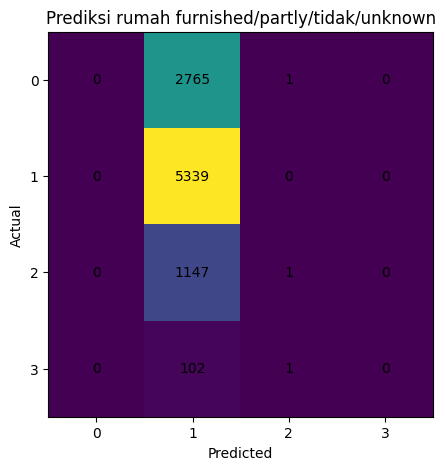

In [ ]:
# latih model
model_prop_svm = SVC(kernel="rbf")
model_prop_svm.fit(X_train, Y_train)

# evaluasi model
hasil_pred_test = model_prop_svm.predict(X_test)

print(classification_report(Y_test, hasil_pred_test))

BuatConfusionMatrix(Y_test, hasil_pred_test, 4, "Prediksi rumah furnished/partly/tidak/unknown")

model ini memprediksi hampir semua data ke kategori 1, partly furnished. terlalu biased. model kurang baik